## Handwritten digits.
### Tasks. Part 0.

1) First thing, grab a piece of paper and visually classify those 25 digits. We'll see if you're better or worse than a computer! 

**Spoiler alert: Davide's efficiency was ~80%, much worse than ML!**


2) Here is how you plot the images and the corresponding labels  (The one thing I'm not telling you of course is the random seed I used to select those above). After you've seen this ones, go back to your piece of paper and update your choices if you want. Keep track of both set of preditions. This is like supervised learning.  


In [1]:
from astroML.datasets import fetch_dr7_quasar
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import sklearn
from tqdm import tqdm
from astropy.visualization.hist import hist as fancyhist
import emcee
import corner
from sklearn import datasets
from sklearn.metrics import confusion_matrix

plt.rcParams['font.size']=16 
plt.rcParams['font.family']='Liberation Serif' 
plt.rcParams['figure.autolayout']=True 
plt.rcParams['mathtext.fontset'] = 'cm'

In [2]:
digits = datasets.load_digits()
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


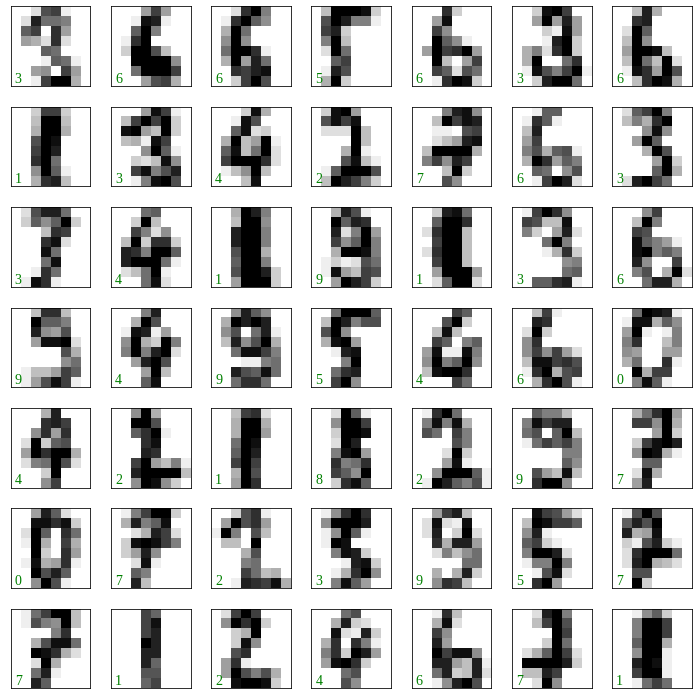

In [3]:
fig, axes = plt.subplots(7,7, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

np.random.seed(1916)
mychoices = np.random.choice(digits.images.shape[0],100)

for i, ax in enumerate(axes.flat):
    ax.imshow((digits.images[mychoices[i]]), 
              cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[mychoices[i]]),transform=ax.transAxes, color='green', fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

### Tasks. Part 1. Unsupervised Learning: Dimensionality Reduction on Digits

We'd like to visualize our points within the 64-dimensional parameter space, but it's difficult to plot points in $N=64$ dimensions! So we need to reduce the dimensionality of the space


3) Use the unsupervised dimensionality reduction technique called **[`Isomap`](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html#sklearn.manifold.Isomap)**. Isomap is an embedding tecnique, which tries to understand if your $N$ dimensional datapoint live in a $N$ dimensional (with $N<M$) manyfold. Have a look at the Isomap documentation and reduce the MINST dataset.  Do some plots to visualize your results 

*Note*. Isomap is very recent. It was introduced by [Tenenbaum et al (2000)](https://www.science.org/doi/10.1126/science.290.5500.2319) ---a paper that has something like $1.5\times 10^4$ [citations](https://www.science.org/doi/full/10.1126/science.290.5500.2319).


In [8]:
X = digits.data
y = digits.target
print(X.shape)

(1797, 64)


In [5]:
from sklearn.manifold import Isomap
embedding = Isomap()
X_transformed = embedding.fit_transform(X)
X_transformed.shape

(1797, 2)

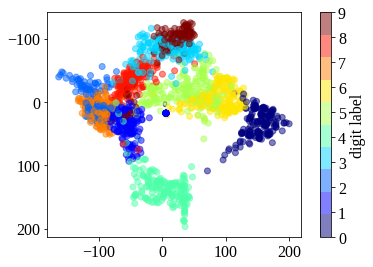

In [6]:
plt.imshow((digits.images[0]), cmap='binary')
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], alpha=0.5, c=digits.target, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(label='digit label', ticks=range(10))

### Tasks. Part 2. Supervised Learning: Classification on Digits

Now we want to classify the dataset. 

4) Split the dataset taking 80% of the images as tranining dataset and leaving the other 20% as a validation set. You need `sklearn.model_selection.train_test_split`.

5) Use a simple [`Logistic Regression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) which despite its name is a common classification algorithm. (I know, this is confusing!). Use the flag `solver='sag'`, the default solver had a bug, at least in my version.

6) Compute the accuracy (`sklearn.metrics.accuracy_score`) of your emulator. In this context, accuracy is simply the fraction of the digits that were correctly identified. Compute the accuracy on both the training and the validation set. Comment on the results.

7) The accuracy is a single number doesn't tell us ***where*** we've gone wrong. Plot the ***confusion matrix*** as we did above. What are the digits that are more challenging to identify, does it make sense?


There are many ways to improve this classifier, for example using a more sophisticated model, use cross validation, etc.  We'll get to those in the coming weeks.

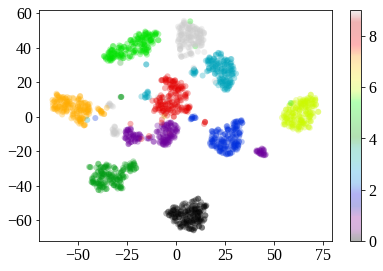

In [9]:
# t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,learning_rate=200)
X_red = tsne.fit_transform(X)

plt.scatter(X_red[:,0],X_red[:,1], c=y, cmap="nipy_spectral", alpha=0.3, edgecolor="None")
plt.colorbar()

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
X_train_tsne, X_test_tsne, Y_train, Y_test = train_test_split(X_red, y, test_size=0.3, random_state = 42)
X_train_iso, X_test_iso, Y_train, Y_test = train_test_split(X_transformed, y, test_size=0.3, random_state = 42)

In [31]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='liblinear').fit(X_train, Y_train)
clf_tsne = LogisticRegression(solver='liblinear').fit(X_train_tsne, Y_train)
clf_iso = LogisticRegression(solver='liblinear').fit(X_train_iso, Y_train)

In [32]:
ypred = clf.predict(X_test)
ypred_tsne = clf_tsne.predict(X_test_tsne)
ypred_iso = clf_iso.predict(X_test_iso)

In [33]:
acc_train = sklearn.metrics.accuracy_score(Y_train, clf.predict(X_train))
acc_test = sklearn.metrics.accuracy_score(Y_test, ypred)
print('Accuracy on the training set:', acc_train)
print('Accuracy on the test set:', acc_test)

Accuracy on the training set: 0.9952267303102625
Accuracy on the test set: 0.9537037037037037


In [34]:
acc_train_tsne = sklearn.metrics.accuracy_score(Y_train, clf_tsne.predict(X_train_tsne))
acc_test_tsne = sklearn.metrics.accuracy_score(Y_test, ypred_tsne)
print('Accuracy on the training set:', acc_train_tsne)
print('Accuracy on the test set:', acc_test_tsne)

Accuracy on the training set: 0.9307875894988067
Accuracy on the test set: 0.9351851851851852


In [35]:
acc_train_iso = sklearn.metrics.accuracy_score(Y_train, clf_iso.predict(X_train_iso))
acc_test_iso = sklearn.metrics.accuracy_score(Y_test, ypred_iso)
print('Accuracy on the training set:', acc_train_iso)
print('Accuracy on the test set:', acc_test_iso)

Accuracy on the training set: 0.6714399363564041
Accuracy on the test set: 0.6444444444444445


<ipython-input-36-c8a5d8251aee>:3: RuntimeWarning: divide by zero encountered in log
  ax[0, 0].imshow(np.log(confusion_matrix(Y_train, clf.predict(X_train))), cmap='Blues')
<ipython-input-36-c8a5d8251aee>:4: RuntimeWarning: divide by zero encountered in log
  ax[0, 1].imshow(np.log(confusion_matrix(Y_train, clf_tsne.predict(X_train_tsne))), cmap='Blues')
<ipython-input-36-c8a5d8251aee>:5: RuntimeWarning: divide by zero encountered in log
  ax[0, 2].imshow(np.log(confusion_matrix(Y_train, clf_iso.predict(X_train_iso))), cmap='Blues')
<ipython-input-36-c8a5d8251aee>:14: RuntimeWarning: divide by zero encountered in log
  ax[1, 0].imshow(np.log(confusion_matrix(Y_test, ypred)), cmap='Blues')
<ipython-input-36-c8a5d8251aee>:15: RuntimeWarning: divide by zero encountered in log
  ax[1, 1].imshow(np.log(confusion_matrix(Y_test, ypred_tsne)), cmap='Blues')
<ipython-input-36-c8a5d8251aee>:16: RuntimeWarning: divide by zero encountered in log
  ax[1, 2].imshow(np.log(confusion_matrix(Y_test, y

Text(0.5, 1.0, 'Test set (accuracy = 0.644)')

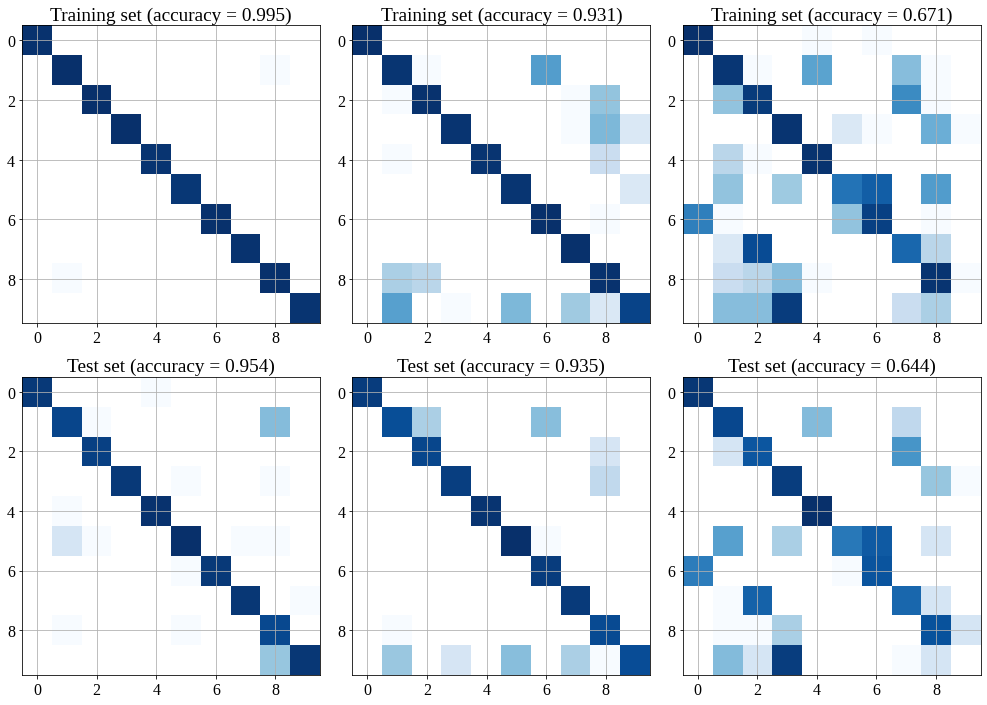

In [36]:
fig, ax = plt.subplots(2, 3, figsize = (14, 10))

ax[0, 0].imshow(np.log(confusion_matrix(Y_train, clf.predict(X_train))), cmap='Blues')
ax[0, 1].imshow(np.log(confusion_matrix(Y_train, clf_tsne.predict(X_train_tsne))), cmap='Blues')
ax[0, 2].imshow(np.log(confusion_matrix(Y_train, clf_iso.predict(X_train_iso))), cmap='Blues')
ax[0, 0].grid()
ax[0, 1].grid()
ax[0, 2].grid()

ax[0, 0].set_title('Training set (accuracy = {:1.3f})'.format(acc_train))
ax[0, 1].set_title('Training set (accuracy = {:1.3f})'.format(acc_train_tsne))
ax[0, 2].set_title('Training set (accuracy = {:1.3f})'.format(acc_train_iso))

ax[1, 0].imshow(np.log(confusion_matrix(Y_test, ypred)), cmap='Blues')
ax[1, 1].imshow(np.log(confusion_matrix(Y_test, ypred_tsne)), cmap='Blues')
ax[1, 2].imshow(np.log(confusion_matrix(Y_test, ypred_iso)), cmap='Blues')
ax[1, 0].grid()
ax[1, 1].grid()
ax[1, 2].grid()

ax[1, 0].set_title('Test set (accuracy = {:1.3f})'.format(acc_test))
ax[1, 1].set_title('Test set (accuracy = {:1.3f})'.format(acc_test_tsne))
ax[1, 2].set_title('Test set (accuracy = {:1.3f})'.format(acc_test_iso))